In [7]:
import pandas as pd
import matplotlib.pyplot as plt

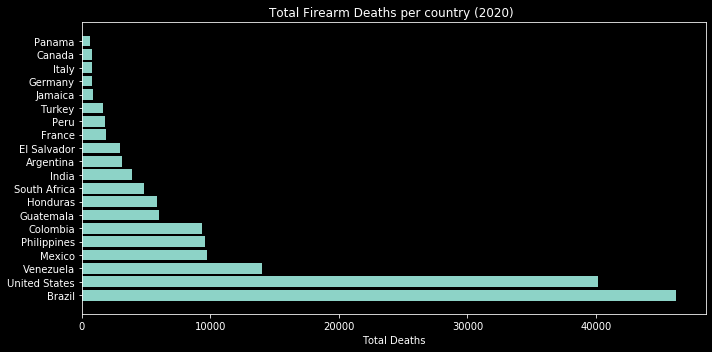

In [25]:
#graph of each countries death rate per 100,000 people
df = pd.read_csv('../Firearmdeaths.csv')
df = df.sort_values(by = 'totalNumber', ascending  = False)
df = df.head(20)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Total Firearm Deaths per country (2020) ')
rects = ax.barh(df.country, df.totalNumber)
ax.set_xlabel('Total Deaths')
plt.tight_layout()
plt.savefig('figures/FirearmDeaths.png')

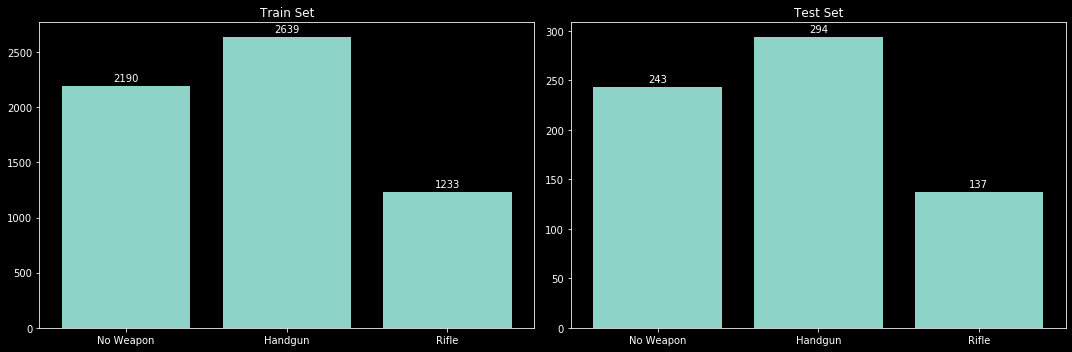

In [44]:

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
fig, ax = plt.subplots(1,2, figsize = (15, 5))
rects1 = ax[0].bar(['No Weapon', 'Handgun', 'Rifle'], [2190, 2639, 1233])
ax[0].set_title('Train Set') 


rects2 = ax[1].bar(['No Weapon', 'Handgun', 'Rifle'], [243, 294, 137])
ax[1].set_title('Test Set')

autolabel(rects1, ax[0])
autolabel(rects2, ax[1])

plt.tight_layout()
plt.savefig('figures/ClassFreq.png')

In [ ]:
def get_image_value(path, dim, edge = False, img_type = 'normal'): 
    if edge: 
        img = cv2.imread(path)
        clone = img.copy() 
        clone = cv2.resize(clone, dim, interpolation = cv2.INTER_CUBIC)
        clone = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

        blurred = cv2.GaussianBlur(img, (3,3), 0)
        wide = cv2.Canny(blurred, 10,200)
        tight = cv2.Canny(blurred, 225, 250)
        auto = auto_canny(blurred)
        wide = cv2.resize(wide, dim, interpolation = cv2.INTER_CUBIC)
        tight = cv2.resize(tight, dim, interpolation = cv2.INTER_CUBIC)
        auto = cv2.resize(auto, dim, interpolation = cv2.INTER_CUBIC)
        print(clone.shape, wide.shape)
        return np.hstack([clone, tight, wide, auto])
    else: 
        img = image.load_img(path, target_size = dim)
        img = image.img_to_array(img)
        
        if img_type =='grey':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img.reshape(img.shape[0], img.shape[1], 1)
            return img
        else: 
            return img/255

test = get_image_value('../Tests/Photos/Pistol4.jpg', var.norm_dimension, img_type = 'mobilenet', edge = True)
cv2.imshow('test', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

##SLIDING WINDOW VIZ 
import time
def sliding_window(image, step_size, windowsize): 
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
#             cv2.rectangle(image, (x, y), (x + windowsize[0], y + windowsize[1]), (255,0,0), 2)
#     cv2.imshow('test', image)
#     cv2.waitKey(0)
    
            yield (x,y,image[y:y + windowsize[1], x:x + windowsize[0]])

    
    
    
df = pd.read_csv('../Separated/PATHS.csv')
img = cv2.imread('Pistol_1097_18.jpg')
df = df[df.filename == 'Pistol_1097_18.jpg']
origstartx = df.xmin.values[0]
origstarty = df.ymin.values[0] 
origendx = df.xmax.values[0] 
origendy  = df.ymax.values[0]

cv2.rectangle(img, (origstartx, origstarty), (origendx, origendy), (0,0,255), 2) 
# sliding_window(img, step_size = 30, windowsize = (30,30))

# windowsize = (80,80)
# for x, y, window in sliding_window(img, step_size = 30, windowsize = windowsize): 
#     clone = img.copy()
#     cv2.rectangle(clone, (x,y), (x+ windowsize[0], y + windowsize[1]), (255, 0, 0), 2)
#     cv2.imshow('Window', clone)
#     cv2.waitKey(0)
#     time.sleep(.025)
# cv2.destroyAllWindows()   
